Fullname: Nguyễn Trọng Hiếu

Student ID: 20120083

# HW3: CUDA Memory

**To compile your file, you can use this command:** \
`nvcc filename.cu -o execute_filename` \
***You can use Vietnamese to anwser the questions***

You can add/delete cells as you see fit. Just don't delete the cells with the Teacher's words.

---

Below is the command to install `Nsight system` on Colab. You just need to run the cell.

In [1]:
# Here is the command to install Nsight system on Colab. You just need to run the cell.
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64/nsight-systems-2023.2.3_2023.2.3.1001-1_amd64.deb
!apt update
!apt install ./nsight-systems-2023.2.3_2023.2.3.1001-1_amd64.deb
!apt --fix-broken install

--2023-12-01 14:49:29--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64/nsight-systems-2023.2.3_2023.2.3.1001-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 317705436 (303M) [application/x-deb]
Saving to: ‘nsight-systems-2023.2.3_2023.2.3.1001-1_amd64.deb’

nsight-systems-2023 100%[===================>] 302.99M   314MB/s    in 1.0s    

2023-12-01 14:49:30 (314 MB/s) - ‘nsight-systems-2023.2.3_2023.2.3.1001-1_amd64.deb’ saved [317705436/317705436]

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [47.6 kB]
Get:4 http://security.ubuntu

- The above installation will be remove when colab restart its runtime. It should be fine for this homework because we don't use Nsight system that much.
- But if you want to persistent install Nsight system, you mount space from your Google Drive to your Colab VM. Read [Here](https://stackoverflow.com/questions/76784746/how-to-use-nsys-in-google-colab) for guidelines how to do thhis.

---

## Question 1

In [8]:
!nvcc HW3_P1.cu -o HW3_P1.out

In [9]:
!./HW3_P1.out in.pnm out_HW3.npm 32 32

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835398144 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Image size (width x height): 512 x 512

Kernel 1, block size 32x32, grid size 16x16
Kernel time: 0.714336 ms
Error: 0.000703

Kernel 2, block size 32x32, grid size 16x16
Kernel time: 2.205696 ms
Error: 0.000703

Kernel 3, block size 32x32, grid size 16x16
Kernel time: 1.759872 ms
Error: 0.000703


## So sánh thời gian thực thi và nhận xét giữa các kernel
* _**kernel 1 (không dùng SMEM) với kernel 2 (dùng SMEM)**_: Kernel 1 chạy nhanh hơn kernel 2 có thể là thời gian tính toán đối với do số lượng tính toán cũng như các thao tác trên từng kernel ko đáng kể so với quá trình chờ copy từ GMEM vào SMEM.

* _**kernel 2 (dùng SMEM không dùng CMEM) với kernel 3 (dùng SMEM và CMEM)**_: Đới với việc cùng dùng SMEM thì thời gian truy suất filter trong CMEM sẽ nhanh hơn do với từ GMEM do đó kernel 3 nhanh hơn kernel 2.


## Question 2

In [10]:
!nvcc HW3_P2.cu -o HW3_P2.out

In [11]:
!./HW3_P2.out 512 1
!./HW3_P2.out 512 3

n =  16777217

GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 17.128033 ms

CORRECT :)
n =  16777217

GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 14.021952 ms

CORRECT :)


In [12]:
# Generate report with nsight system
!nsys profile ./HW3_P2.out 512 1
!nsys profile ./HW3_P2.out 512 3

n =  16777217

GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 16.855072 ms

CORRECT :)
Generating '/tmp/nsys-report-c1bc.qdstrm'
[1/1] [========================100%] report1.nsys-rep
Generated:
    /content/report1.nsys-rep
n =  16777217

GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 13.539968 ms

CORRECT :)
Generating '/tmp/nsys-report-9b4d.qdstrm'
[1/1] [========================100%] report2.nsys-rep
Generated:
    /content/report2.nsys-rep


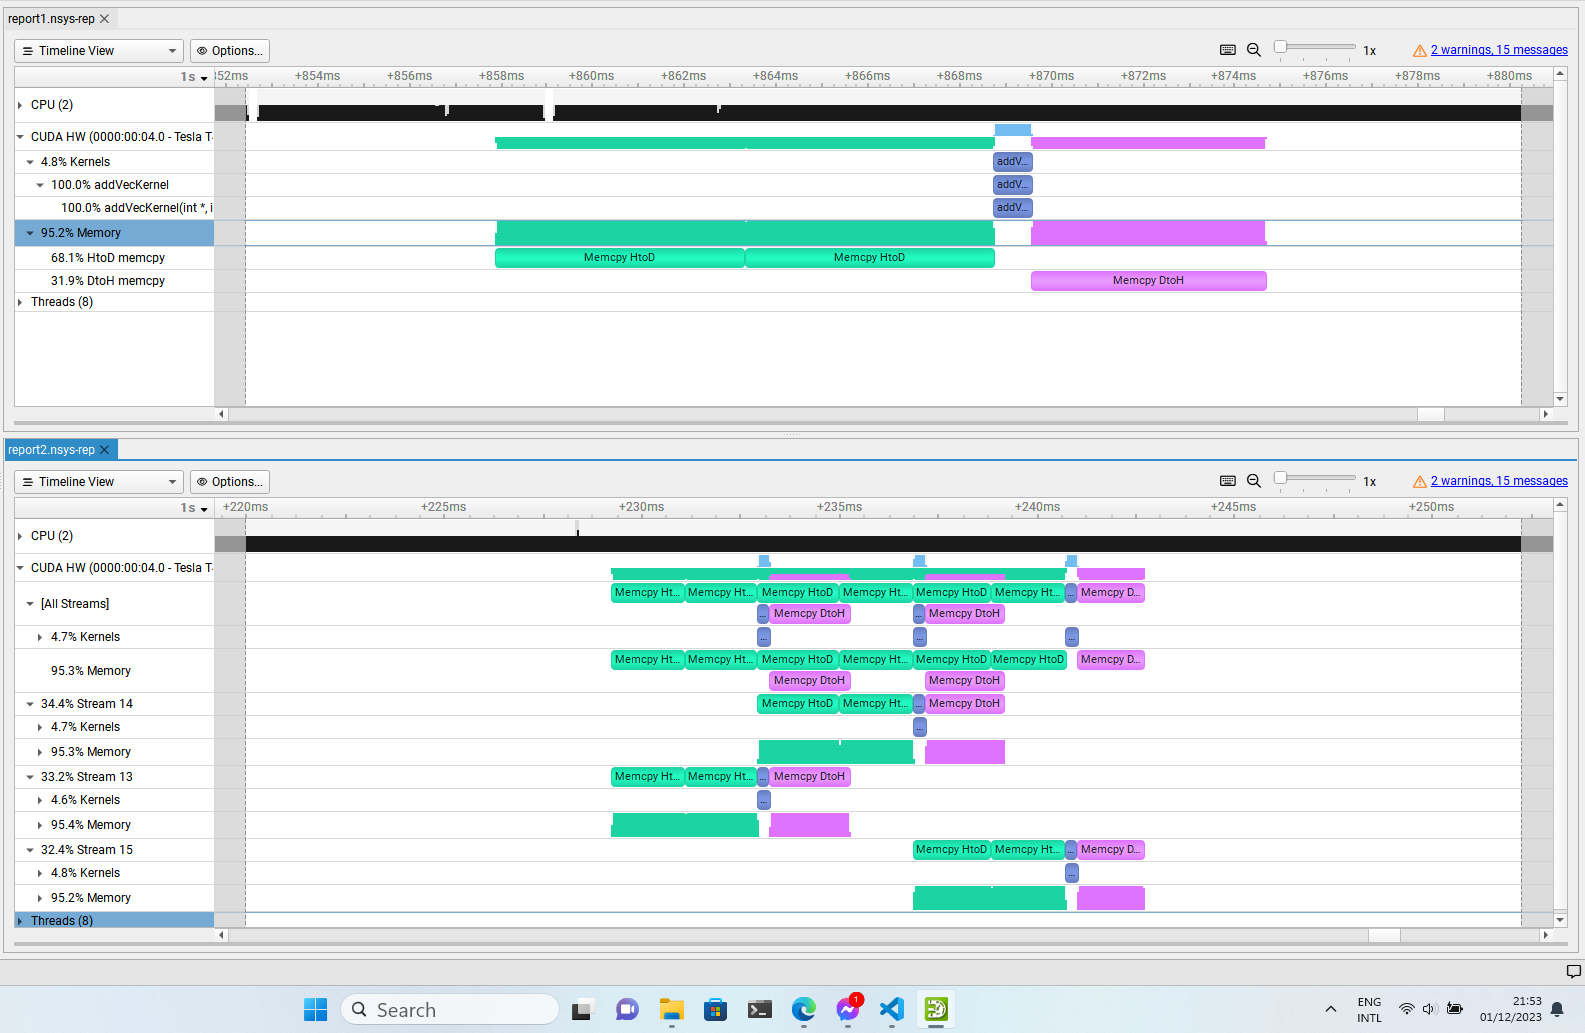

In [15]:
from IPython.display import Image

# Specify the path to your image file
image_path = 'stream_illustrate.png'

# Display the image
Image(filename=image_path)
